In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
# Data Loading and Preprocessing
file_path = 'CarSharing_Preprocessed.csv'  
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for Deep Neural Network: 0.1932042980751716


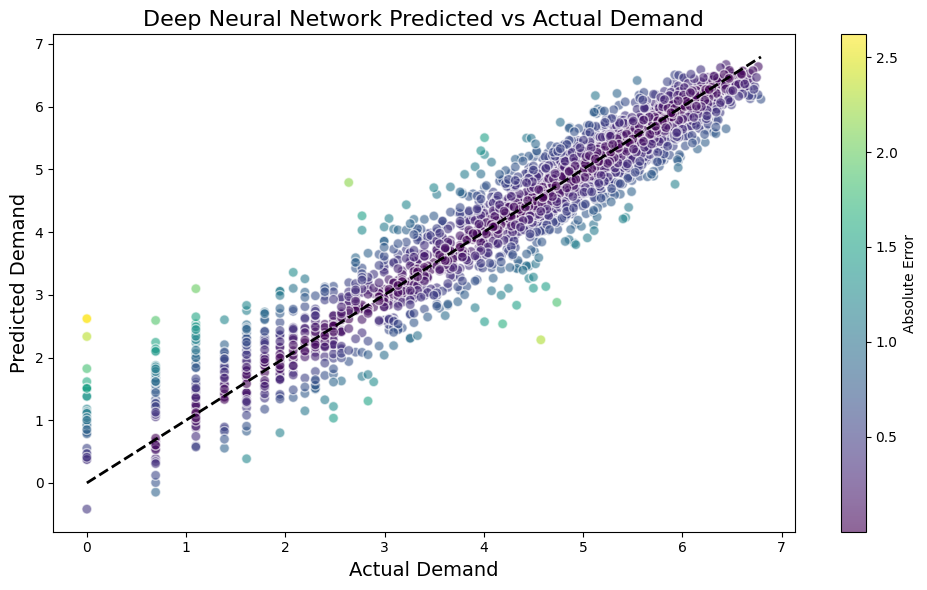

In [3]:
# Label Encoding to convert categorical variables into numeric format 
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['workingday'] = label_encoder.fit_transform(df['workingday'])
df['weather'] = label_encoder.fit_transform(df['weather'])

# Feature Engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Data Preparation for Model Training
X = df.drop(['id', 'demand'], axis=1)  
y = df['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Normalisation for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


################## Deep Neural Network ##################

# Building the Model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Model Compilation and Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# Prediction and Evaluation 
y_pred_dnn = model.predict(X_test_scaled).flatten()
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
print(f'Mean Squared Error for Deep Neural Network: {mse_dnn}')

# Visualisation of Predictions for DNN
errors = np.abs(y_test - y_pred_dnn)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_dnn, alpha=0.6, c=errors, cmap='viridis', edgecolor='w', s=50)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Absolute Error')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Deep Neural Network Predicted vs Actual Demand', fontsize=16)
plt.xlabel('Actual Demand', fontsize=14)
plt.ylabel('Predicted Demand', fontsize=14)
plt.tight_layout()
plt.show()



Mean Squared Error for Random Forest Regressor: 0.18596331657028517


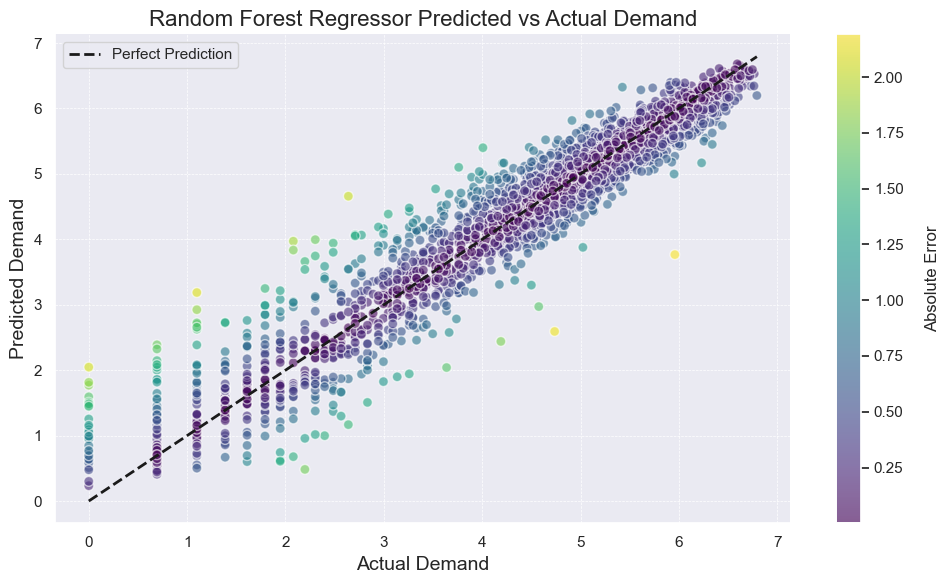

In [4]:
############## Random Forest Regressor ##############

# Model Initialisation and Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction and Model Evaluation (MSE)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'\nMean Squared Error for Random Forest Regressor: {mse_rf}')

# Visualisation of Predictions for Random Forest

sns.set(rc={'figure.figsize':(10, 6)})
errors = np.abs(y_test - y_pred_rf)
scatter = plt.scatter(y_test, y_pred_rf, alpha=0.6, c=errors, cmap='viridis', edgecolor='w', s=50)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Absolute Error', labelpad=15)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Random Forest Regressor Predicted vs Actual Demand', fontsize=16)
plt.xlabel('Actual Demand', fontsize=14)
plt.ylabel('Predicted Demand', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.legend()
plt.tight_layout() 
plt.show()

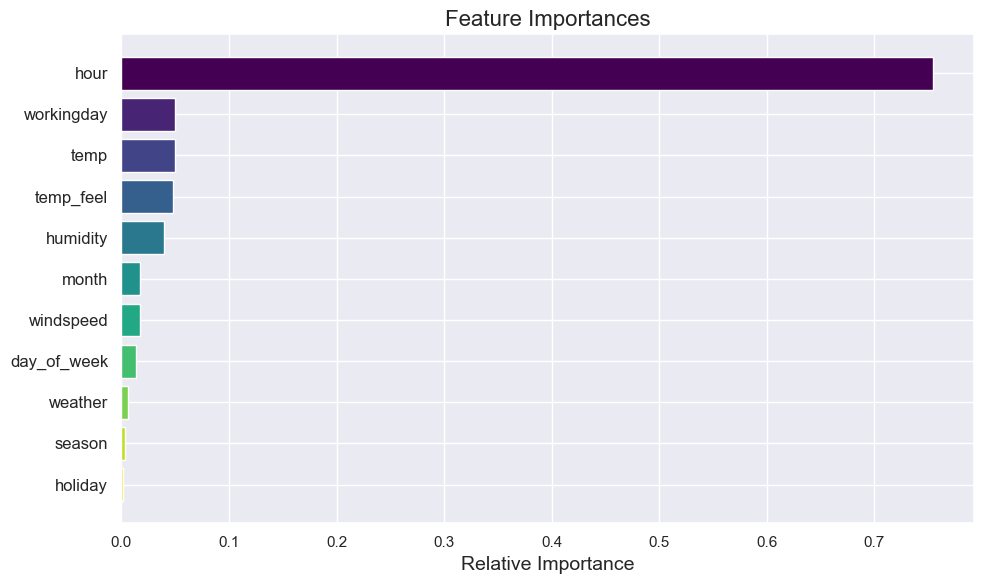

In [5]:
# Feature importance

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  
feature_names = [X.columns[i] for i in indices]
colors = plt.cm.viridis(np.linspace(0, 1, len(indices)))

plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), feature_names, fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()